## Steps to follow:

1. Import the data
2. Explore the data and identify things that would be worth exploring
3. Write two functions to make two different kinds of plots using matplotlib and seaborn (one each)
4. It might be a good idea to look at one of the categorical variables (gender, race/ethinicity) and the test scores 
5. Push your work back and send me a link to the repo!

In [1]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import mode
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
sns.set_context('poster')

In [2]:
df = pd.read_csv('StudentsPerformance.csv',index_col=None)
print(df.dtypes)
print(df.isna().sum())

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [3]:
print(df.isna().count())
print(df.isna().any())
print(df.info())
print(df.describe())
df.head()

gender                         1000
race/ethnicity                 1000
parental level of education    1000
lunch                          1000
test preparation course        1000
math score                     1000
reading score                  1000
writing score                  1000
dtype: int64
gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [5]:
print(df['race/ethnicity'].nunique())
print(df['race/ethnicity'].unique())
print(df['race/ethnicity'].value_counts(normalize=True))

5
['group B' 'group C' 'group A' 'group D' 'group E']
group C    0.319
group D    0.262
group B    0.190
group E    0.140
group A    0.089
Name: race/ethnicity, dtype: float64


In [6]:
print(df['gender'].nunique())
print(df['gender'].unique())
print(df['gender'].value_counts(normalize=True))

2
['female' 'male']
female    0.518
male      0.482
Name: gender, dtype: float64


In [7]:
print(df['parental level of education'].nunique())
print(df['parental level of education'].unique())
print(df['parental level of education'].value_counts(normalize=True))

6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
some college          0.226
associate's degree    0.222
high school           0.196
some high school      0.179
bachelor's degree     0.118
master's degree       0.059
Name: parental level of education, dtype: float64


In [8]:
print(df['lunch'].nunique())
print(df['lunch'].unique())
print(df['lunch'].value_counts(normalize=True))

2
['standard' 'free/reduced']
standard        0.645
free/reduced    0.355
Name: lunch, dtype: float64


In [9]:
print(df['test preparation course'].nunique())
print(df['test preparation course'].unique())
print(df['test preparation course'].value_counts(normalize=True))

2
['none' 'completed']
none         0.642
completed    0.358
Name: test preparation course, dtype: float64


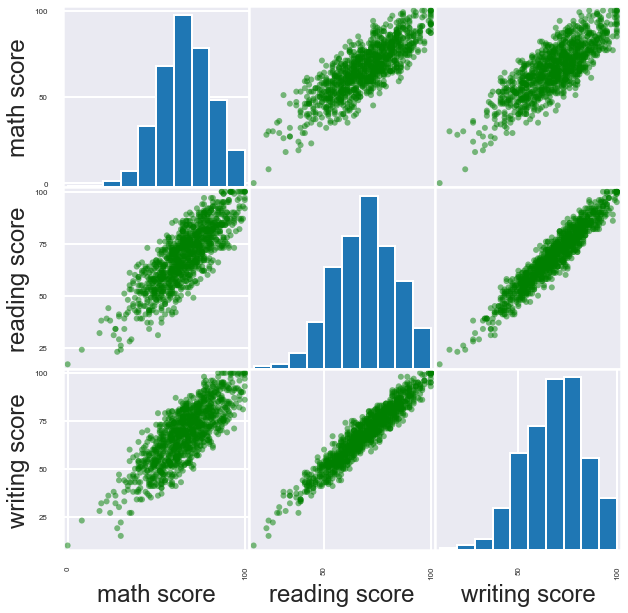

In [10]:
pd.plotting.scatter_matrix(df[['math score', 'reading score', 'writing score']], color='green', figsize=(10,10));

In [11]:
df.corr()['math score'].sort_values()

writing score    0.802642
reading score    0.817580
math score       1.000000
Name: math score, dtype: float64

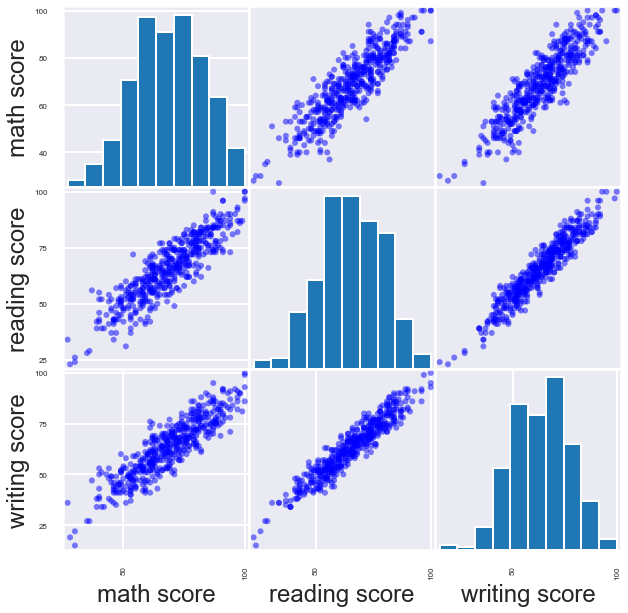

In [12]:
pd.plotting.scatter_matrix(df.loc[df['gender']=='male',['math score', 'reading score', 'writing score']], color='blue', figsize=(10,10));

In [13]:
df[df['gender']=='male'].corr()['math score'].sort_values()

reading score    0.885489
writing score    0.891973
math score       1.000000
Name: math score, dtype: float64

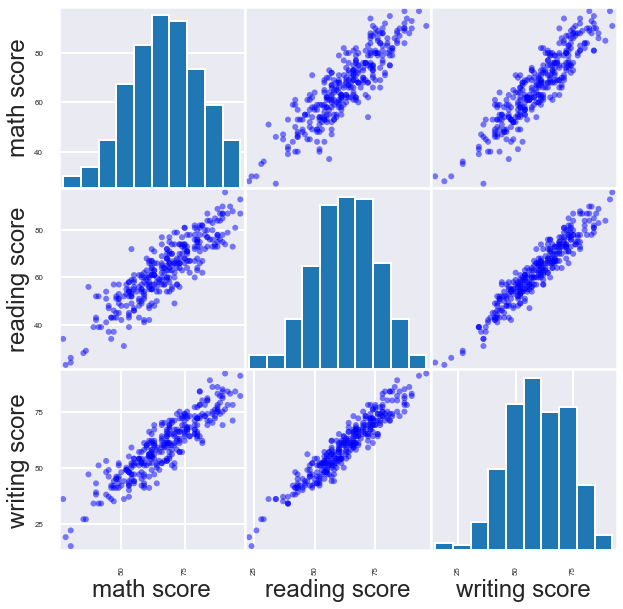

In [14]:
pd.plotting.scatter_matrix(df.loc[(df['gender']=='male') & (df['test preparation course'] == 'none'),['math score', 'reading score', 'writing score']], color='blue', figsize=(10,10));

In [15]:
df[(df['gender']=='male') & (df['test preparation course'] == 'none')].corr()['math score'].sort_values()

reading score    0.878207
writing score    0.904077
math score       1.000000
Name: math score, dtype: float64

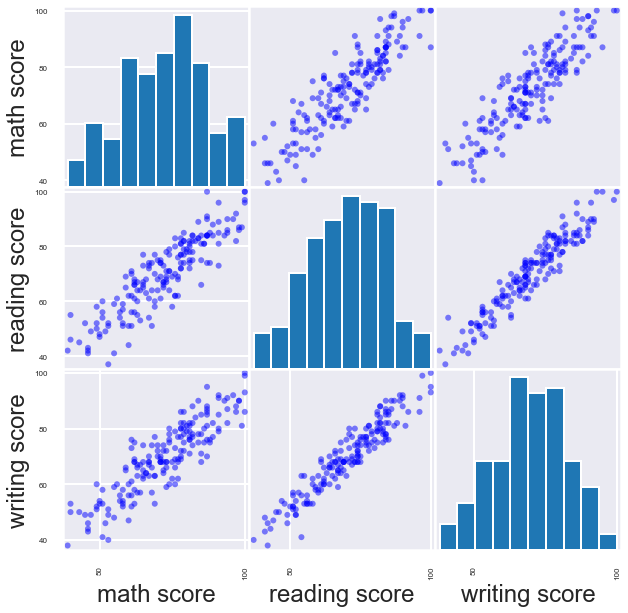

In [16]:
pd.plotting.scatter_matrix(df.loc[(df['gender']=='male') & (df['test preparation course'] == 'completed'),['math score', 'reading score', 'writing score']], color='blue', figsize=(10,10));

In [17]:
df[(df['gender']=='male') & (df['test preparation course'] == 'completed')].corr()['math score'].sort_values()

writing score    0.884884
reading score    0.888071
math score       1.000000
Name: math score, dtype: float64

In [18]:
df[(df['gender']=='male') & ((df['parental level of education'] == 'high school') | (df['parental level of education'] == 'some high school'))].corr()['math score'].sort_values()

writing score    0.879316
reading score    0.882993
math score       1.000000
Name: math score, dtype: float64

In [19]:
df[(df['gender']=='male') & (df['parental level of education'] == 'bachelor\'s degree')].corr()['math score'].sort_values()

reading score    0.838687
writing score    0.874833
math score       1.000000
Name: math score, dtype: float64

In [20]:
df[(df['gender']=='male') & (df['parental level of education'] == 'some college')].corr()['math score'].sort_values()

writing score    0.892875
reading score    0.892946
math score       1.000000
Name: math score, dtype: float64

In [21]:
df[(df['gender']=='male') & (df['parental level of education'] == 'associate\'s degree')].corr()['math score'].sort_values()

reading score    0.888706
writing score    0.917744
math score       1.000000
Name: math score, dtype: float64

In [22]:
df[(df['gender']=='male') & (df['parental level of education'] == 'master\'s degree')].corr()['math score'].sort_values()

writing score    0.889393
reading score    0.920325
math score       1.000000
Name: math score, dtype: float64

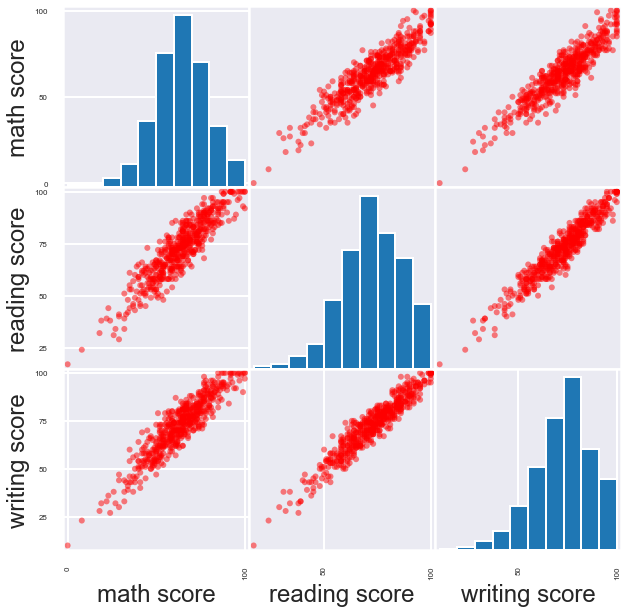

In [23]:
pd.plotting.scatter_matrix(df.loc[df['gender']=='female',['math score', 'reading score', 'writing score']], color='red', figsize=(10,10));

In [24]:
df[(df['gender']=='female') & (df['test preparation course'] == 'none')].corr()['math score'].sort_values()

reading score    0.918899
writing score    0.935310
math score       1.000000
Name: math score, dtype: float64

In [25]:
df[(df['gender']=='female') & (df['test preparation course'] == 'completed')].corr()['math score'].sort_values()

reading score    0.883360
writing score    0.910624
math score       1.000000
Name: math score, dtype: float64

In [26]:
df[(df['gender']=='female') & ((df['parental level of education'] == 'high school') | (df['parental level of education'] == 'some high school'))].corr()['math score'].sort_values()

reading score    0.915142
writing score    0.933945
math score       1.000000
Name: math score, dtype: float64

In [27]:
df[(df['gender']=='female') & (df['parental level of education'] == 'bachelor\'s degree')].corr()['math score'].sort_values()

writing score    0.904057
reading score    0.928228
math score       1.000000
Name: math score, dtype: float64

In [28]:
df[(df['gender']=='female') & (df['parental level of education'] == 'some college')].corr()['math score'].sort_values()

reading score    0.884223
writing score    0.913709
math score       1.000000
Name: math score, dtype: float64

In [29]:
df[(df['gender']=='female') & (df['parental level of education'] == 'associate\'s degree')].corr()['math score'].sort_values()

reading score    0.880796
writing score    0.895398
math score       1.000000
Name: math score, dtype: float64

In [30]:
df[(df['gender']=='female') & (df['parental level of education'] == 'master\'s degree')].corr()['math score'].sort_values()

writing score    0.937151
reading score    0.939282
math score       1.000000
Name: math score, dtype: float64

In [31]:
df.groupby('gender')['race/ethnicity'].value_counts(normalize=True)

gender  race/ethnicity
female  group C           0.347490
        group D           0.249035
        group B           0.200772
        group E           0.133205
        group A           0.069498
male    group C           0.288382
        group D           0.275934
        group B           0.178423
        group E           0.147303
        group A           0.109959
Name: race/ethnicity, dtype: float64

In [32]:
df.groupby('gender').sum()

,math score,reading score,writing score
gender,,,
female,32962,37611,37538
male,33127,31558,30516


In [33]:
df.groupby('race/ethnicity').sum()

,math score,reading score,writing score
race/ethnicity,,,
group A,5485,5756,5578
group B,12056,12797,12464
group C,20564,22044,21637
group D,17649,18348,18378
group E,10335,10224,9997


In [34]:
df.groupby(['gender','race/ethnicity'])['math score'].describe()

count       mean        std   min    25%   50%    75%  \
gender race/ethnicity                                                          
female group A          36.0  58.527778  14.157252  34.0  48.75  57.0  68.25   
       group B         104.0  61.403846  16.256750   8.0  52.00  62.0  73.00   
       group C         180.0  62.033333  15.007224   0.0  53.00  63.0  71.00   
       group D         129.0  65.248062  14.174157  26.0  56.00  65.0  75.00   
       group E          69.0  70.811594  16.269129  32.0  61.00  71.0  81.00   
male   group A          53.0  63.735849  14.520742  28.0  53.00  63.0  72.00   
       group B          86.0  65.930233  14.156928  30.0  57.25  65.0  75.75   
       group C         139.0  67.611511  14.090037  27.0  58.00  68.0  78.00   
       group D         133.0  69.413534  13.094139  39.0  61.00  71.0  80.00   
       group E          71.0  76.746479  14.298570  30.0  68.50  78.0  87.00   

                         max  
gender race/ethnicity         
female group A          92.0  
       group B          97.0  
       group C          96.0  
       group D          98.0  
       group E         100.0  
male   group A         100.0  
       group B          94.0  
       group C          98.0  
       group D         100.0  
       group E         100.0

In [35]:
df.groupby(['gender','race/ethnicity'])['math score'].apply(lambda x:x.mode())

gender  race/ethnicity   
female  group A         0    59
        group B         0    58
        group C         0    65
        group D         0    69
        group E         0    74
male    group A         0    53
                        1    62
        group B         0    60
                        1    62
        group C         0    58
        group D         0    80
        group E         0    68
                        1    76
                        2    81
                        3    87
Name: math score, dtype: int64

In [36]:
df.groupby(['gender','race/ethnicity'])['math score'].apply(lambda x:mode(x,axis=None)[0])

gender  race/ethnicity
female  group A           [59.0]
        group B           [58.0]
        group C           [65.0]
        group D           [69.0]
        group E           [74.0]
male    group A           [53.0]
        group B           [60.0]
        group C           [58.0]
        group D           [80.0]
        group E           [68.0]
Name: math score, dtype: object

In [37]:
df.groupby(['gender','race/ethnicity','parental level of education'])['math score'].describe()

count       mean  \
gender race/ethnicity parental level of education                     
female group A        associate's degree             6.0  57.500000   
                      bachelor's degree              3.0  51.666667   
                      high school                    7.0  60.428571   
                      master's degree                2.0  50.000000   
                      some college                   8.0  62.125000   
                      some high school              10.0  58.700000   
       group B        associate's degree            23.0  62.652174   
                      bachelor's degree             11.0  71.363636   
                      high school                   28.0  59.000000   
                      master's degree                5.0  70.800000   
                      some college                  15.0  61.133333   
                      some high school              22.0  56.227273   
       group C        associate's degree            45.0  64.777778   
                      bachelor's degree             26.0  65.807692   
                      high school                   30.0  55.633333   
                      master's degree                7.0  62.000000   
                      some college                  44.0  63.613636   
                      some high school              28.0  58.500000   
       group D        associate's degree            24.0  63.375000   
                      bachelor's degree             13.0  69.769231   
                      high school                   17.0  61.470588   
                      master's degree               15.0  66.600000   
                      some college                  35.0  68.114286   
                      some high school              25.0  62.440000   
       group E        associate's degree            18.0  74.833333   
                      bachelor's degree             10.0  74.800000   
                      high school                   12.0  65.833333   
                      master's degree                7.0  72.428571   
                      some college                  16.0  70.062500   
                      some high school               6.0  62.166667   
male   group A        associate's degree             8.0  63.625000   
                      bachelor's degree              9.0  72.333333   
                      high school                   11.0  60.454545   
                      master's degree                1.0  73.000000   
                      some college                  10.0  65.300000   
                      some high school              14.0  59.071429   
       group B        associate's degree            18.0  70.500000   
                      bachelor's degree              9.0  66.777778   
                      high school                   20.0  60.900000   
                      master's degree                1.0  49.000000   
                      some college                  22.0  64.590909   
                      some high school              16.0  69.500000   
       group C        associate's degree            33.0  69.393939   
                      bachelor's degree             14.0  72.500000   
                      high school                   34.0  65.558824   
                      master's degree               12.0  70.000000   
                      some college                  25.0  67.800000   
                      some high school              21.0  63.285714   
       group D        associate's degree            26.0  71.500000   
                      bachelor's degree             15.0  65.666667   
                      high school                   27.0  63.740741   
                      master's degree                8.0  83.625000   
                      some college                  32.0  69.406250   
                      some high school              25.0  71.080000   
       group E        associate's degree            21.0  74.952381   
    

In [38]:
# gender, race
df.rename(columns={'race/ethnicity':'race'}, inplace=True)
race_grouped = df.groupby(['race', 'gender'])['math score', 'reading score', 'writing score'].agg(['mean', 'min', 'max', 'std'])
race_grouped.head()

math score                     reading score           \
                     mean min  max        std          mean min  max   
race    gender                                                         
group A female  58.527778  34   92  14.157252     69.000000  43  100   
        male    63.735849  28  100  14.520742     61.735849  23   96   
group B female  61.403846   8   97  16.256750     71.076923  24   97   
        male    65.930233  30   94  14.156928     62.848837  24   96   
group C female  62.033333   0   96  15.007224     71.944444  17  100   

                          writing score                      
                      std          mean min  max        std  
race    gender                                               
group A female  14.847799     67.861111  41   97  14.652455  
        male    15.451103     59.150943  19   92  15.137061  
group B female  14.612598     70.048077  23   96  14.891439  
        male    14.695752     60.220930  15   92  14.854907  
group C female  13.900574     71.777778  10  100  14.806595

In [39]:
print(race_grouped.index)
race_grouped.reset_index(inplace=True)
race_grouped.head()

MultiIndex([('group A', 'female'),
            ('group A',   'male'),
            ('group B', 'female'),
            ('group B',   'male'),
            ('group C', 'female'),
            ('group C',   'male'),
            ('group D', 'female'),
            ('group D',   'male'),
            ('group E', 'female'),
            ('group E',   'male')],
           names=['race', 'gender'])


race  gender math score                     reading score           \
                         mean min  max        std          mean min  max   
0  group A  female  58.527778  34   92  14.157252     69.000000  43  100   
1  group A    male  63.735849  28  100  14.520742     61.735849  23   96   
2  group B  female  61.403846   8   97  16.256750     71.076923  24   97   
3  group B    male  65.930233  30   94  14.156928     62.848837  24   96   
4  group C  female  62.033333   0   96  15.007224     71.944444  17  100   

             writing score                      
         std          mean min  max        std  
0  14.847799     67.861111  41   97  14.652455  
1  15.451103     59.150943  19   92  15.137061  
2  14.612598     70.048077  23   96  14.891439  
3  14.695752     60.220930  15   92  14.854907  
4  13.900574     71.777778  10  100  14.806595

In [40]:
print(race_grouped.index)
print(race_grouped.columns)
print(race_grouped.columns.get_level_values(0))
print(race_grouped.columns.get_level_values(1))

RangeIndex(start=0, stop=10, step=1)
MultiIndex([(         'race',     ''),
            (       'gender',     ''),
            (   'math score', 'mean'),
            (   'math score',  'min'),
            (   'math score',  'max'),
            (   'math score',  'std'),
            ('reading score', 'mean'),
            ('reading score',  'min'),
            ('reading score',  'max'),
            ('reading score',  'std'),
            ('writing score', 'mean'),
            ('writing score',  'min'),
            ('writing score',  'max'),
            ('writing score',  'std')],
           )
Index(['race', 'gender', 'math score', 'math score', 'math score',
       'math score', 'reading score', 'reading score', 'reading score',
       'reading score', 'writing score', 'writing score', 'writing score',
       'writing score'],
      dtype='object')
Index(['', '', 'mean', 'min', 'max', 'std', 'mean', 'min', 'max', 'std',
       'mean', 'min', 'max', 'std'],
      dtype='object')


In [41]:
race_cols0 = race_grouped.columns.get_level_values(0)
race_cols1 = race_grouped.columns.get_level_values(1)
race_grouped.columns = list(race_col0 + '_' + race_col1 if race_col1 != '' else race_col0 for race_col0, race_col1 in list(zip(race_cols0, race_cols1)))
print(race_grouped.columns)
race_grouped.head()

Index(['race', 'gender', 'math score_mean', 'math score_min', 'math score_max',
       'math score_std', 'reading score_mean', 'reading score_min',
       'reading score_max', 'reading score_std', 'writing score_mean',
       'writing score_min', 'writing score_max', 'writing score_std'],
      dtype='object')


,race,gender,math score_mean,math score_min,math score_max,math score_std,reading score_mean,reading score_min,reading score_max,reading score_std,writing score_mean,writing score_min,writing score_max,writing score_std
0,group A,female,58.527778,34,92,14.157252,69.000000,43,100,14.847799,67.861111,41,97,14.652455
1,group A,male,63.735849,28,100,14.520742,61.735849,23,96,15.451103,59.150943,19,92,15.137061
2,group B,female,61.403846,8,97,16.256750,71.076923,24,97,14.612598,70.048077,23,96,14.891439
3,group B,male,65.930233,30,94,14.156928,62.848837,24,96,14.695752,60.220930,15,92,14.854907
4,group C,female,62.033333,0,96,15.007224,71.944444,17,100,13.900574,71.777778,10,100,14.806595


In [42]:
race_math_pivot = race_grouped.pivot(index='race', columns='gender', values='math score_mean')
race_math_pivot.head()

gender,female,male
race,,
group A,58.527778,63.735849
group B,61.403846,65.930233
group C,62.033333,67.611511
group D,65.248062,69.413534
group E,70.811594,76.746479


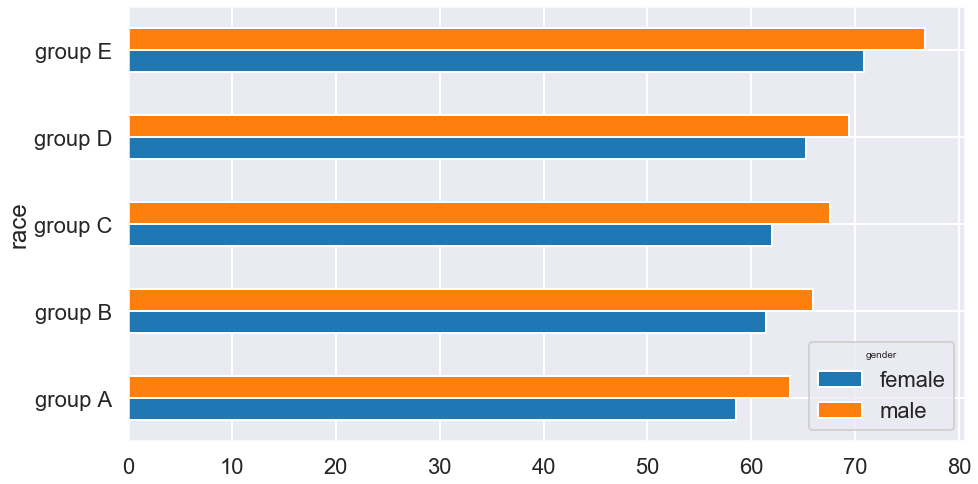

In [43]:
race_math_pivot.plot(kind='barh', figsize=(15,8))

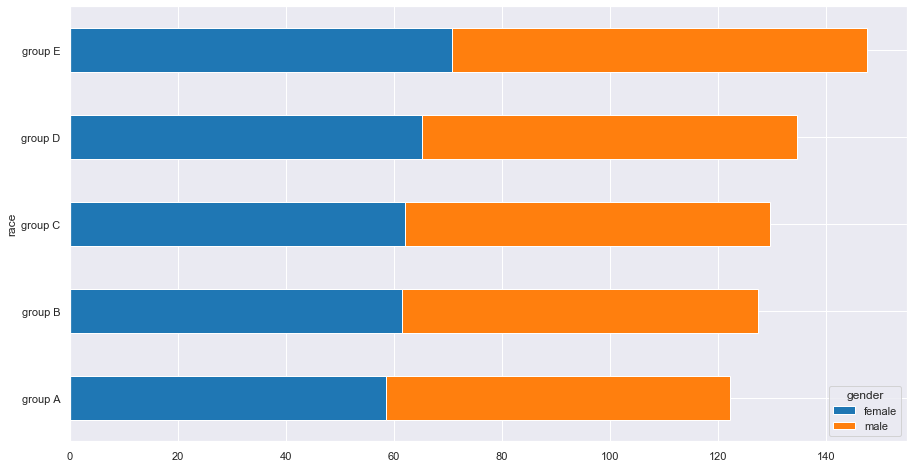

In [77]:
race_math_pivot.plot(kind='barh', figsize=(15,8), stacked=True)

In [44]:
#race_math_pivot.reset_index(inplace=True)
#race_math_pivot.head()

In [45]:
#race_math_pivot.set_index('race').plot(kind='barh', figsize=(15,8))

In [46]:
# gender, parental education level
df.rename(columns={'parental level of education':'education'}, inplace=True)
education_grouped = df.groupby(['education', 'gender'])['math score', 'reading score', 'writing score'].agg(['mean', 'min', 'max', 'std'])
education_grouped.head()

math score                     reading score      \
                                mean min  max        std          mean min   
education          gender                                                    
associate's degree female  65.250000  26  100  14.879151     74.120690  31   
                   male    70.764151  40  100  14.905130     67.433962  37   
bachelor's degree  female  68.349206  29  100  15.635112     77.285714  41   
                   male    70.581818  37  100  14.158744     68.090909  42   
high school        female  59.351064   8   99  15.123653     68.202128  24   

                                          writing score                      
                           max        std          mean min  max        std  
education          gender                                                    
associate's degree female  100  13.200893     74.000000  38  100  13.307076  
                   male    100  13.798564     65.405660  35   95  14.077187  
bachelor's degree  female  100  14.251688     78.380952  38  100  13.750576  
                   male    100  12.766090     67.654545  38  100  13.796428  
high school        female   99  14.082384     66.691489  23  100  14.378917

In [47]:
print(education_grouped.index)
education_grouped.reset_index(inplace=True)
education_grouped.head()

MultiIndex([('associate's degree', 'female'),
            ('associate's degree',   'male'),
            ( 'bachelor's degree', 'female'),
            ( 'bachelor's degree',   'male'),
            (       'high school', 'female'),
            (       'high school',   'male'),
            (   'master's degree', 'female'),
            (   'master's degree',   'male'),
            (      'some college', 'female'),
            (      'some college',   'male'),
            (  'some high school', 'female'),
            (  'some high school',   'male')],
           names=['education', 'gender'])


education  gender math score                     reading score  \
                                    mean min  max        std          mean   
0  associate's degree  female  65.250000  26  100  14.879151     74.120690   
1  associate's degree    male  70.764151  40  100  14.905130     67.433962   
2   bachelor's degree  female  68.349206  29  100  15.635112     77.285714   
3   bachelor's degree    male  70.581818  37  100  14.158744     68.090909   
4         high school  female  59.351064   8   99  15.123653     68.202128   

                      writing score                      
  min  max        std          mean min  max        std  
0  31  100  13.200893     74.000000  38  100  13.307076  
1  37  100  13.798564     65.405660  35   95  14.077187  
2  41  100  14.251688     78.380952  38  100  13.750576  
3  42  100  12.766090     67.654545  38  100  13.796428  
4  24   99  14.082384     66.691489  23  100  14.378917

In [48]:
print(education_grouped.index)
print(education_grouped.columns)
print(education_grouped.columns.get_level_values(0))
print(education_grouped.columns.get_level_values(1))

education_cols0 = education_grouped.columns.get_level_values(0)
education_cols1 = education_grouped.columns.get_level_values(1)
education_grouped.columns = list(education_col0 + '_' + education_col1 if education_col1 != '' else education_col0 for education_col0, education_col1 in list(zip(education_cols0, education_cols1)))
print(education_grouped.columns)
education_grouped.head()

RangeIndex(start=0, stop=12, step=1)
MultiIndex([(    'education',     ''),
            (       'gender',     ''),
            (   'math score', 'mean'),
            (   'math score',  'min'),
            (   'math score',  'max'),
            (   'math score',  'std'),
            ('reading score', 'mean'),
            ('reading score',  'min'),
            ('reading score',  'max'),
            ('reading score',  'std'),
            ('writing score', 'mean'),
            ('writing score',  'min'),
            ('writing score',  'max'),
            ('writing score',  'std')],
           )
Index(['education', 'gender', 'math score', 'math score', 'math score',
       'math score', 'reading score', 'reading score', 'reading score',
       'reading score', 'writing score', 'writing score', 'writing score',
       'writing score'],
      dtype='object')
Index(['', '', 'mean', 'min', 'max', 'std', 'mean', 'min', 'max', 'std',
       'mean', 'min', 'max', 'std'],
      dtype='object')
Index

,education,gender,math score_mean,math score_min,math score_max,math score_std,reading score_mean,reading score_min,reading score_max,reading score_std,writing score_mean,writing score_min,writing score_max,writing score_std
0,associate's degree,female,65.250000,26,100,14.879151,74.120690,31,100,13.200893,74.000000,38,100,13.307076
1,associate's degree,male,70.764151,40,100,14.905130,67.433962,37,100,13.798564,65.405660,35,95,14.077187
2,bachelor's degree,female,68.349206,29,100,15.635112,77.285714,41,100,14.251688,78.380952,38,100,13.750576
3,bachelor's degree,male,70.581818,37,100,14.158744,68.090909,42,100,12.766090,67.654545,38,100,13.796428
4,high school,female,59.351064,8,99,15.123653,68.202128,24,99,14.082384,66.691489,23,100,14.378917


In [49]:
education_math_pivot = education_grouped.pivot(index='education', columns='gender', values='math score_mean')
education_math_pivot.head()

gender,female,male
education,,
associate's degree,65.250000,70.764151
bachelor's degree,68.349206,70.581818
high school,59.351064,64.705882
master's degree,66.500000,74.826087
some college,65.406780,69.009259


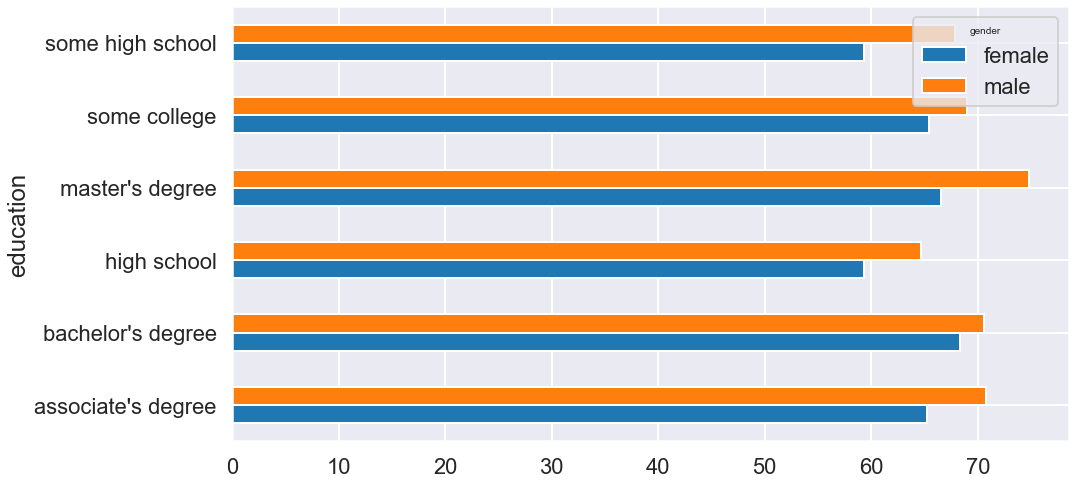

In [50]:
education_math_pivot.plot(kind='barh', figsize=(15,8))

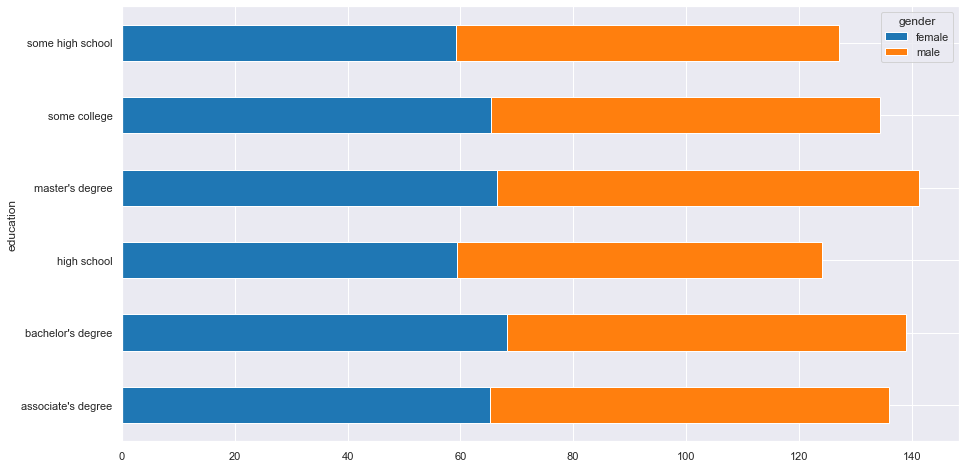

In [78]:
education_math_pivot.plot(kind='barh', figsize=(15,8), stacked=True)

In [51]:
 df[(df['education'] == 'high school') | (df['education'] == 'some high school')].groupby(['gender','race']).corr()['math score']

gender  race                  
female  group A  math score       1.000000
                 reading score    0.908769
                 writing score    0.939998
        group B  math score       1.000000
                 reading score    0.927507
                 writing score    0.948274
        group C  math score       1.000000
                 reading score    0.933450
                 writing score    0.956297
        group D  math score       1.000000
                 reading score    0.880587
                 writing score    0.897287
        group E  math score       1.000000
                 reading score    0.944715
                 writing score    0.919862
male    group A  math score       1.000000
                 reading score    0.859260
                 writing score    0.798395
        group B  math score       1.000000
                 reading score    0.895429
                 writing score    0.919955
        group C  math score       1.000000
                 readin

In [52]:
df[df['education'] == 'bachelor\'s degree'].groupby(['gender','race']).corr()['math score']

gender  race                  
female  group A  math score       1.000000
                 reading score    0.629614
                 writing score    0.386014
        group B  math score       1.000000
                 reading score    0.841141
                 writing score    0.808789
        group C  math score       1.000000
                 reading score    0.932312
                 writing score    0.927709
        group D  math score       1.000000
                 reading score    0.978787
                 writing score    0.931337
        group E  math score       1.000000
                 reading score    0.974315
                 writing score    0.982714
male    group A  math score       1.000000
                 reading score    0.782000
                 writing score    0.850864
        group B  math score       1.000000
                 reading score    0.795506
                 writing score    0.871394
        group C  math score       1.000000
                 readin

In [53]:
df[df['education'] == 'some college'].groupby(['gender','race']).corr()['math score']

gender  race                  
female  group A  math score       1.000000
                 reading score    0.849580
                 writing score    0.909855
        group B  math score       1.000000
                 reading score    0.972740
                 writing score    0.945150
        group C  math score       1.000000
                 reading score    0.877636
                 writing score    0.907144
        group D  math score       1.000000
                 reading score    0.833176
                 writing score    0.912517
        group E  math score       1.000000
                 reading score    0.921677
                 writing score    0.952224
male    group A  math score       1.000000
                 reading score    0.974471
                 writing score    0.956630
        group B  math score       1.000000
                 reading score    0.922137
                 writing score    0.906044
        group C  math score       1.000000
                 readin

In [54]:
df[df['education'] == 'associate\'s degree'].groupby(['gender','race']).corr()['math score']

gender  race                  
female  group A  math score       1.000000
                 reading score    0.933271
                 writing score    0.964175
        group B  math score       1.000000
                 reading score    0.840839
                 writing score    0.871168
        group C  math score       1.000000
                 reading score    0.832713
                 writing score    0.865472
        group D  math score       1.000000
                 reading score    0.905428
                 writing score    0.894296
        group E  math score       1.000000
                 reading score    0.942456
                 writing score    0.931304
male    group A  math score       1.000000
                 reading score    0.902649
                 writing score    0.882443
        group B  math score       1.000000
                 reading score    0.938461
                 writing score    0.924552
        group C  math score       1.000000
                 readin

In [55]:
df[df['education'] == 'master\'s degree'].groupby(['gender','race']).corr()['math score']

gender  race                  
female  group A  math score            NaN
                 reading score         NaN
                 writing score         NaN
        group B  math score       1.000000
                 reading score    0.935004
                 writing score    0.893116
        group C  math score       1.000000
                 reading score    0.953219
                 writing score    0.916213
        group D  math score       1.000000
                 reading score    0.948588
                 writing score    0.944298
        group E  math score       1.000000
                 reading score    0.975982
                 writing score    0.996092
male    group A  math score            NaN
                 reading score         NaN
                 writing score         NaN
        group B  math score            NaN
                 reading score         NaN
                 writing score         NaN
        group C  math score       1.000000
                 readin

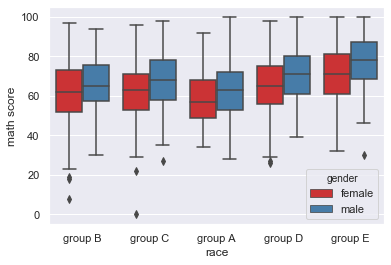

In [56]:
sns.set_context('notebook')
sns.boxplot(x="race", y="math score", hue="gender", data=df, palette="Set1")

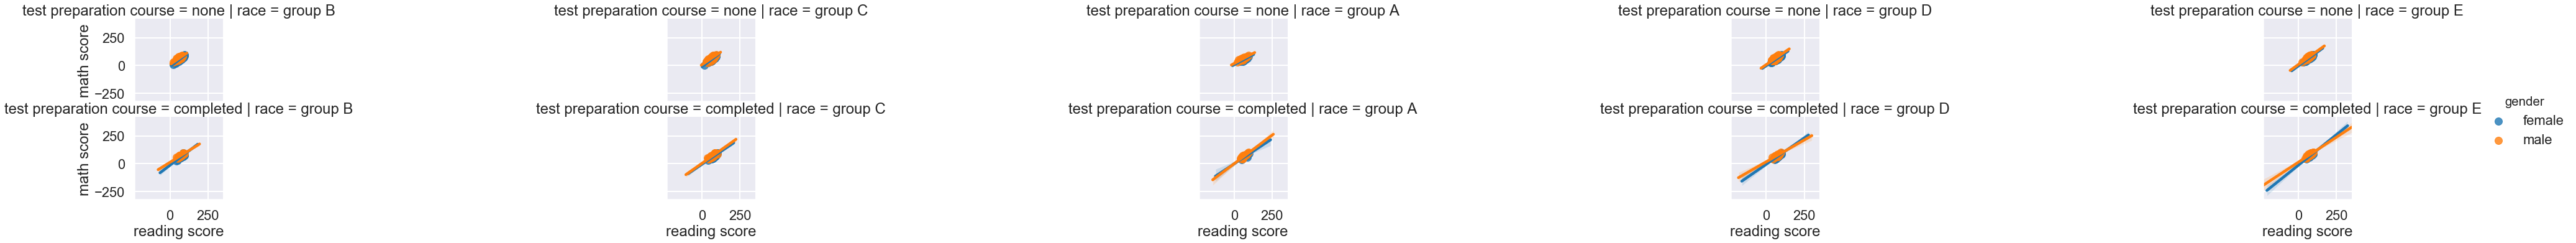

In [57]:
sns.set_context('poster')
g = sns.lmplot(x="reading score", y="math score", hue="gender",
           col="race", row="test preparation course", data=df)
g.fig.set_figwidth(60)
g.fig.set_figheight(5)
plt.savefig('mathVSreading_raceINC_testINR.png', format='png')

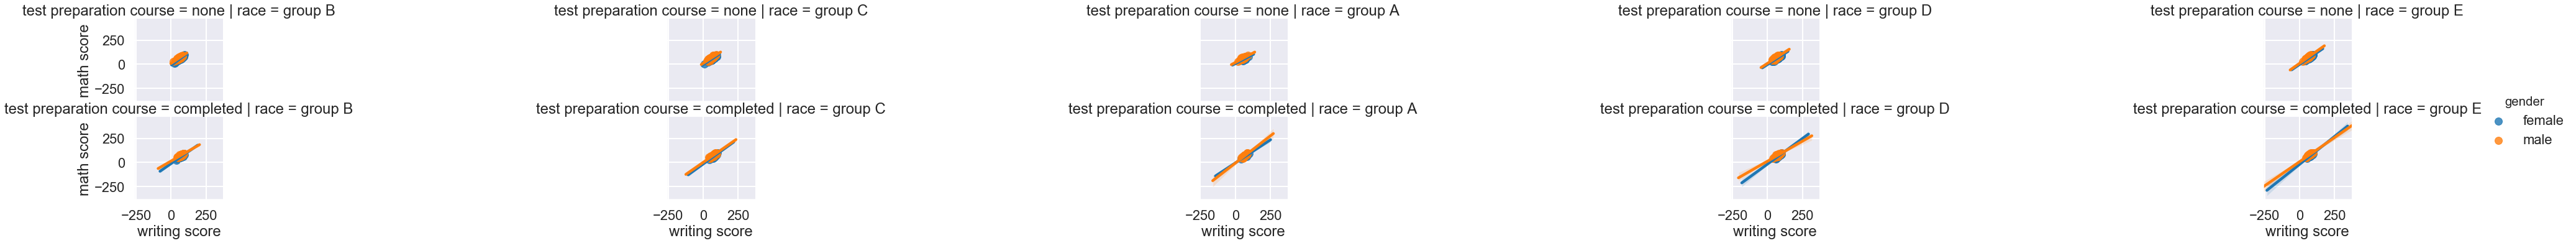

In [58]:
sns.set_context('poster')
g = sns.lmplot(x="writing score", y="math score", hue="gender",
           col="race", row="test preparation course", data=df)
g.fig.set_figwidth(60)
g.fig.set_figheight(5)
plt.savefig('mathVSwriting_raceINC_testINR.png', format='png')

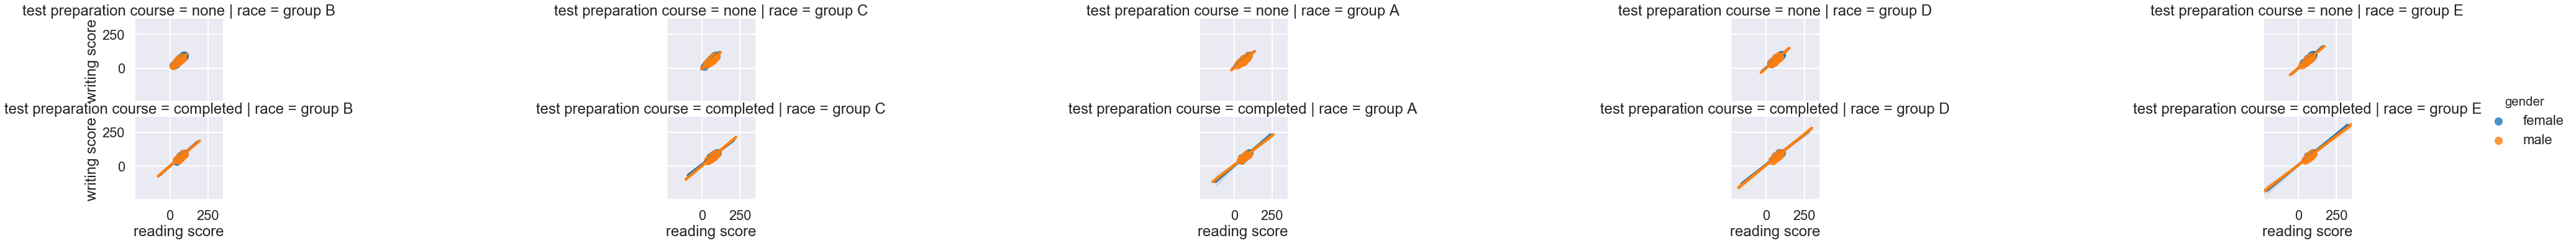

In [59]:
sns.set_context('poster')
g = sns.lmplot(x="reading score", y="writing score", hue="gender",
           col="race", row="test preparation course", data=df)
g.fig.set_figwidth(60)
g.fig.set_figheight(5)
plt.savefig('writingVSreading_raceINC_testINR.png', format='png')

In [60]:
df.groupby(['gender','race'])['reading score'].apply(lambda x:x.mode())

gender  race      
female  group A  0     59
                 1     65
                 2     70
                 3     73
                 4     85
        group B  0     70
        group C  0     72
        group D  0     58
                 1     78
                 2     86
                 3    100
        group E  0     76
                 1    100
male    group A  0     67
        group B  0     54
        group C  0     66
        group D  0     66
        group E  0     74
Name: reading score, dtype: int64

In [61]:
df.groupby(['gender','race'])['reading score'].apply(lambda x:mode(x,axis=None)[0])

gender  race   
female  group A    [59.0]
        group B    [70.0]
        group C    [72.0]
        group D    [58.0]
        group E    [76.0]
male    group A    [67.0]
        group B    [54.0]
        group C    [66.0]
        group D    [66.0]
        group E    [74.0]
Name: reading score, dtype: object

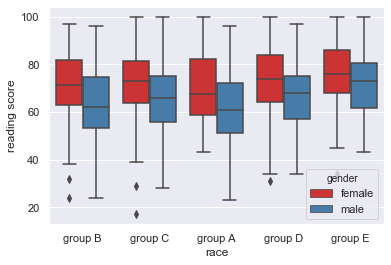

In [62]:
sns.set_context('notebook')
sns.boxplot(x="race", y="reading score", hue="gender", data=df, palette="Set1")

In [63]:
df.groupby(['gender','race'])['writing score'].apply(lambda x: x.mode())

gender  race      
female  group A  0     58
                 1     64
                 2     67
                 3     73
                 4     76
                 5     82
        group B  0     70
        group C  0     74
        group D  0     74
        group E  0     70
                 1    100
male    group A  0     43
        group B  0     57
                 1     60
        group C  0     54
                 1     61
                 2     65
                 3     68
        group D  0     69
        group E  0     71
                 1     72
                 2     76
Name: writing score, dtype: int64

In [64]:
df.groupby(['gender','race'])['writing score'].apply(lambda x: mode(x,axis=None)[0])

gender  race   
female  group A    [58.0]
        group B    [70.0]
        group C    [74.0]
        group D    [74.0]
        group E    [70.0]
male    group A    [43.0]
        group B    [57.0]
        group C    [54.0]
        group D    [69.0]
        group E    [71.0]
Name: writing score, dtype: object

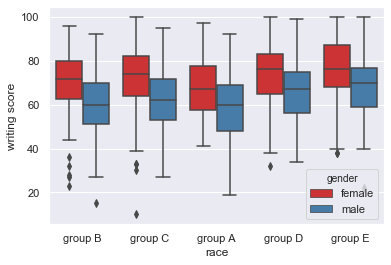

In [65]:
sns.set_context('notebook')
sns.boxplot(x="race", y="writing score", hue="gender", data=df, palette="Set1")

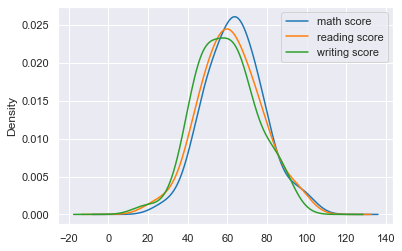

In [66]:
df[(df['gender']=='male') & (df['race']=='group A')].plot(kind='kde')

In [67]:
def show_subhistos(dataframe, axis, color, category, column_name):
    sns.set_context('notebook')
    axis.hist(dataframe[column_name], bins='auto', color=color)
    axis.set_title('Distribution of {} for {}'.format(column_name, category))
    axis.set_xlabel(column_name)
    axis.set_ylabel('Count')
    axis.axvline(dataframe[column_name].mean(), color='teal', linewidth=3)
    axis.axvline(mode(dataframe[column_name],axis=None)[0], color='red', marker='^', markersize=8)
    axis.axvline(dataframe[column_name].median(), color='magenta', linewidth=3, linestyle='-.')

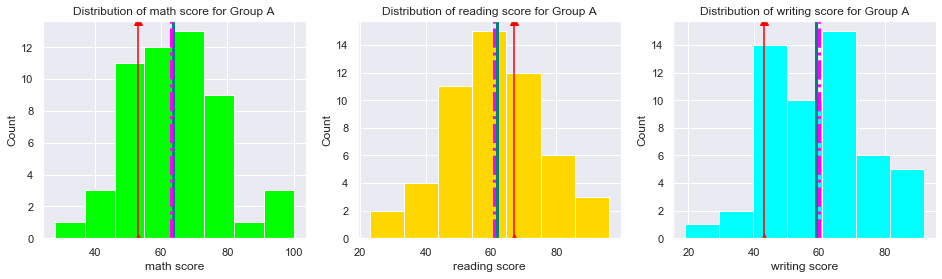

In [68]:
male_gA_df = df[(df['gender']=='male') & (df['race']=='group A')]

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16,4))
show_subhistos(male_gA_df, axes[0], 'lime', 'Group A', 'math score')
show_subhistos(male_gA_df, axes[1], 'gold', 'Group A', 'reading score')
show_subhistos(male_gA_df, axes[2], 'cyan', 'Group A', 'writing score')

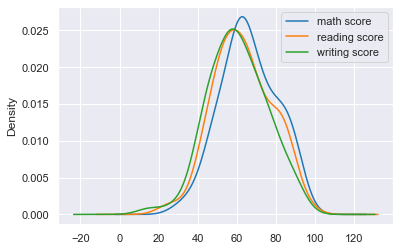

In [69]:
df[(df['gender']=='male') & (df['race']=='group B')].plot(kind='kde')

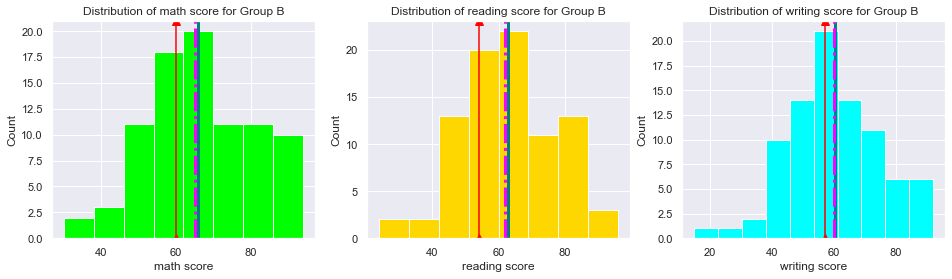

In [70]:
male_gB_df = df[(df['gender']=='male') & (df['race']=='group B')]

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16,4))
show_subhistos(male_gB_df, axes[0], 'lime', 'Group B', 'math score')
show_subhistos(male_gB_df, axes[1], 'gold', 'Group B', 'reading score')
show_subhistos(male_gB_df, axes[2], 'cyan', 'Group B', 'writing score')

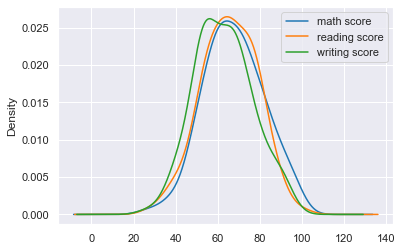

In [71]:
df[(df['gender']=='male') & (df['race']=='group C')].plot(kind='kde',)

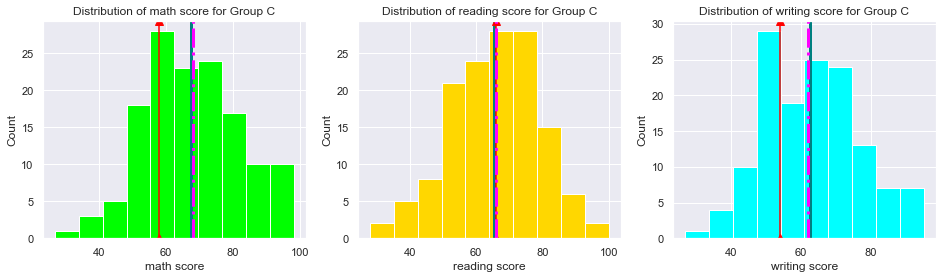

In [72]:
male_gC_df = df[(df['gender']=='male') & (df['race']=='group C')]

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16,4))
show_subhistos(male_gC_df, axes[0], 'lime', 'Group C', 'math score')
show_subhistos(male_gC_df, axes[1], 'gold', 'Group C', 'reading score')
show_subhistos(male_gC_df, axes[2], 'cyan', 'Group C', 'writing score')

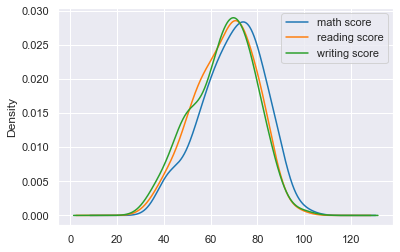

In [73]:
df[(df['gender']=='male') & (df['race']=='group D')].plot(kind='kde')

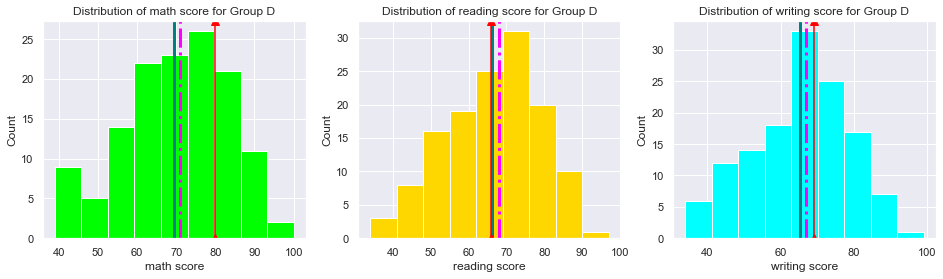

In [74]:
male_gD_df = df[(df['gender']=='male') & (df['race']=='group D')]

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16,4))
show_subhistos(male_gD_df, axes[0], 'lime', 'Group D', 'math score')
show_subhistos(male_gD_df, axes[1], 'gold', 'Group D', 'reading score')
show_subhistos(male_gD_df, axes[2], 'cyan', 'Group D', 'writing score')

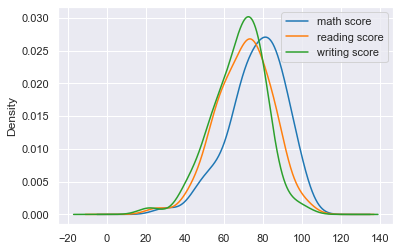

In [75]:
df[(df['gender']=='male') & (df['race']=='group E')].plot(kind='kde')

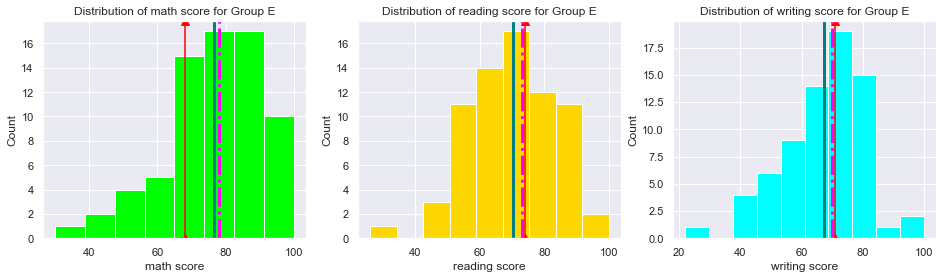

In [76]:
male_gE_df = df[(df['gender']=='male') & (df['race']=='group E')]

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(16,4))
show_subhistos(male_gE_df, axes[0], 'lime', 'Group E', 'math score')
show_subhistos(male_gE_df, axes[1], 'gold', 'Group E', 'reading score')
show_subhistos(male_gE_df, axes[2], 'cyan', 'Group E', 'writing score')